In [601]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline


In [602]:
#Punto 1
    #Circulo unitario frecuentista
    
def circulo_fre():
       
    # Se generan los puntos aleatorios entre los intervalos dados
    eje_x = np.random.uniform(-1, 1, size=(2, 1000))
    eje_y = np.random.uniform(0, 1, size=(2, 1000))
    
    alea = np.linspace(0,1,1000)
    radio = 1.0
    
    #Se grafica una linea continua en el intervalo dado
    
    dis_x =radio*np.cos(np.pi*alea)
    
    dis_y =radio*np.sin(np.pi*alea)
    
    #Se tienen en cuenta los puntos que estan adentro y afuera de la grafica
    #Se realiza una condicion en la que los puntos que sean menores al radio =1, se colorean de azul
    #Los puntos que se encuntren por fuera del radio = 1 se colorean de color rojo
    inside = (eje_x**2 + eje_y**2) <= radio
    
    outside = (eje_x**2 + eje_y**2) > radio
    
    #Se realiza la grafica de la linea de distancia
    plt.plot(dis_x,dis_y, label="dist")
    
    #Se realizan los puntos y se distinguen por colores 
    
    plt.plot(eje_x[inside], eje_y[inside], 'b.', label="abajo")
    
    plt.plot(eje_x[outside], eje_y[outside], 'r.', label="arriba")
    
    
    plt.axis('square')
    
    #Se delimitan los ejes
    
    plt.xlim(-1.1,1.1)
    plt.ylim(0,1.1)
    
    #Se colocan las etiquetas, los titulos y la leyenda
    
    plt.legend(loc=1)
    plt.title("Semi-Circulo unitario frecuentista")
    plt.xlabel("X")
    plt.ylabel("Y")


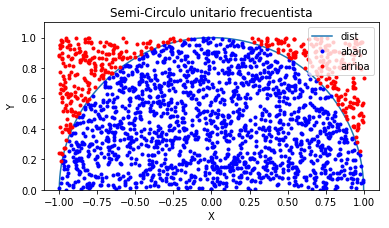

In [603]:
circulo_fre()

In [604]:
#Punto 2

x = np.linspace(0,6.0,1000)

def funcion(x):
    #Se declara la funcion dad
    
    p=0.3/(np.sqrt(0.0025*np.pi))
    n=0.7/(np.sqrt(np.pi))
    y=-(((x-5.0)/0.05)*((x-5.0)/0.05))
    x=-((x-2)*(x-2))
    e= p*np.exp(y) + n*np.exp(x)
    return e

In [605]:
fun=funcion(x)

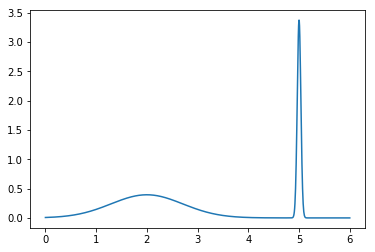

In [606]:
plt.plot(x,fun)

In [607]:
#Se generan puntos aleatorios en los puntos dados 
eje_x1 = np.random.uniform(0, 6, size=(3, 1000))

eje_y1 = np.random.uniform(0,3.5, size=(3, 1000))
  

Text(0,0.5,u'Y')

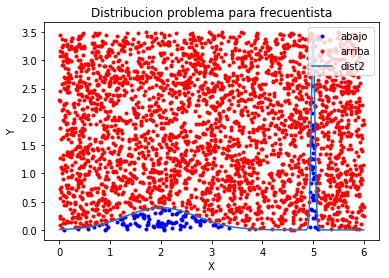

In [608]:
#Se tienen en cuenta los puntos que estan adentro y afuera de la grafica
#Se realiza una condicion en la que los puntos que estan debajo de la funcion se colorean de azul
#Los puntos que se encuntren por fuera se colorean de color rojo

inside1 = eje_y1 <= funcion(eje_x1)
    
outside1 = eje_y1 > funcion(eje_x1)

#Se grafican los puntos con los colores dados por la condicion
plt.plot(eje_x1[inside1], eje_y1[inside1], 'b.', label="abajo")    
plt.plot(eje_x1[outside1], eje_y1[outside1], 'r.', label="arriba")
plt.plot(x,fun, label = "dist2") 

#Se colocan las etiquetas, los titulos y la leyenda

plt.legend(loc=1)
plt.title("Distribucion problema para frecuentista")
plt.xlabel("X")
plt.ylabel("Y")


Text(0,0.5,u'Y')

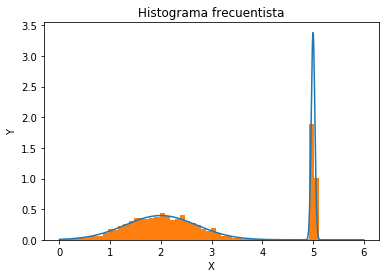

In [609]:
#Punto 3
#Se generan los valores en los intervalos
eje_x2 = np.random.uniform(0, 6, size=(6, 10000))

eje_y2 = np.random.uniform(0,3.5, size=(6, 10000))

#Se realiza la condicion en la que se tienen solo encuenta los valores que se encuentran debajo de la grafica
inside2 = eje_y2 <= funcion(eje_x2)

#Se guardan los valores en las variables
valores_x = eje_x2[inside2] 
valores_y = eje_y2[inside2]

#Se normaliza la funcion inicial 
normali= np.sum(fun*(x[1]-x[0]))
f_n= fun/normali

#Se grafica el histograma
plt.plot(x,f_n)

count, bins, ignored = plt.hist(valores_x, 50, normed=True)

#Se colocan las etiquetas y el titulo
plt.title("Histograma frecuentista")
plt.xlabel("X")
plt.ylabel("Y")

In [610]:
print"La fraccion de puntos que no se toman en cuenta son: ", 95-(valores_x[2]/100), "%"

La fraccion de puntos que no se toman en cuenta son:  94.9807146856 %


In [619]:
#Punto 4
#Ayuda del repositorio
#Se utiliza el metodo metropolis hastings

step1 = []
eje_x = 6.0*random.random() # Se generan los numeros aleatorios 
step1 = np.append(step1,eje_x) # Se utiliza un array con los datos


for i in range(10000):
    
    eje_xp = np.random.normal(step1[i], 1.0) # Se genera un nuevo punto usando una gaussiana
    aleta1 = funcion(eje_xp)/funcion(step1[i]) #Se hace la relacion entre los puntos aleatorios y los nuevos puntos 
    
    #Se generan las condiciones de probabilidad
    condi= aleta1<1.0 #Esto significa que el punto nuevo tiene menor probabilidad que el punto anterior
    condi2= aleta2>aleta1#Los nuevos puntos generados son mayores a la relacion 
    
    if(condi):      
        aleta2 = np.random.random()#En este caso el x nuevo no se acepta como el siguiente punto por lo que se crean nuevos puntos
        
        #Se genera una nueva condicion teniendo en cuenta los nuevos puntos generados 
        if(condi2): 
            step1 = np.append(step1,step1[i])#Si se acepta la condicion el x siguiente es igual al x nuevo
        else:
            step1 = np.append(step1,eje_xp)#En caso contrario continua de la misma manera
    else:
        step1  = np.append(step1,eje_xp)#En este caso el x nuevo es aceptado como el siguiente punto

Text(0,0.5,u'Y')

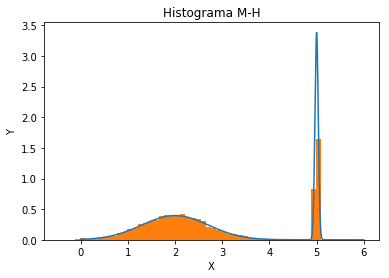

In [620]:

x1 = np.linspace(0,6.0,1000)
fun1 = funcion(x)

norm = sum(fun1*(x1[1]-x1[0]))
plt.plot(x1,fun1/norm)

#Se eliminan los datos con ruido
step2 = step1[500:]

#Se grafica el histograma
count, bins, ignored = plt.hist(step2, 50, normed=True)

#Se colocan las etiquetas y el titulo
plt.title("Histograma M-H")
plt.xlabel("X")
plt.ylabel("Y")
